# Tensoflow Tutorial

In [1]:
# Import the necessary Libraries

import datetime,warnings,scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"]=True
plt.style.use('fivethirtyeight')
mpl.rc('patch',edgecolor='dimgray',linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="last_expr"
pd.options.display.max_columns=50
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv("air_quality (3).csv", sep=' ')
df.head()

,No,Profile,Tanggal,Jam,O3,CO,NO2,SO2,NO,CO2,VOC,PM1,PM2.5,PM4,PM10,TSP,TEMP,HUM,WS,WD,ISPU,Status,Unnamed: 22
0,1,BANDUNG,2019-05-19,00:04:19,21.35,0.78,6.77,14.06,26.168,409.86,251.202,0.0,0.0,0.0,2.77,0.0,21.4,100.0,0.600,5,9,BAIK,NaN
1,2,BANDUNG,2019-05-19,00:15:01,5.93,0.82,14.87,17.23,53.853,394.79,501.356,0.0,0.0,0.0,11.95,0.0,42.6,200.0,0.000,2,12,BAIK,NaN
2,3,BANDUNG,2019-05-19,00:30:06,6.62,0.63,22.24,2.31,38.304,390.66,753.291,0.0,0.0,0.0,12.71,0.0,63.6,299.2,0.000,2,13,BAIK,NaN
3,4,BANDUNG,2019-05-19,00:49:19,13.29,0.44,19.00,5.32,18.962,401.23,251.043,0.0,0.0,0.0,1.20,0.0,21.3,88.2,0.525,5,6,BAIK,NaN
4,5,BANDUNG,2019-05-19,01:04:19,2.44,0.47,26.74,13.61,35.270,381.67,250.471,0.0,0.0,0.0,3.52,0.0,21.3,97.4,0.975,5,9,BAIK,NaN


In [4]:

df.tail()

,No,Profile,Tanggal,Jam,O3,CO,NO2,SO2,NO,CO2,VOC,PM1,PM2.5,PM4,PM10,TSP,TEMP,HUM,WS,WD,ISPU,Status,Unnamed: 22
9226,9227,BANDUNG,2019-08-18,23:12:37,2.60,0.26,2.82,2.06,83.055,389.93,216.296,0.0,0.0,0.0,12.90,0.0,20.8,68.1,166.875,4,13,BAIK,NaN
9227,9228,BANDUNG,2019-08-18,23:22:37,3.92,0.20,21.88,9.09,48.923,379.97,218.820,0.0,0.0,0.0,5.68,0.0,20.7,68.0,115.425,4,6,BAIK,NaN
9228,9229,BANDUNG,2019-08-18,23:32:37,6.14,0.21,16.31,11.05,58.404,385.59,216.940,0.0,0.0,0.0,15.43,0.0,20.6,68.5,196.725,5,15,BAIK,NaN
9229,9230,BANDUNG,2019-08-18,23:42:38,7.73,0.23,13.07,18.28,71.299,379.31,211.317,0.0,0.0,0.0,1.01,0.0,20.6,68.5,172.500,5,11,BAIK,NaN
9230,9231,BANDUNG,2019-08-18,23:52:37,1.96,0.23,17.75,9.39,45.510,382.03,216.255,0.0,0.0,0.0,15.56,0.0,20.4,69.1,43.950,4,16,BAIK,NaN


In [5]:
# Convert Time to datetime format:

def combine_date(df,tab_name):
    list_tab=[]
    for i in range(df.shape[0]):
        list_tab.append(df.loc[i,'Tanggal']+'T'+df.loc[i,tab_name][0:2])
    return np.array(list_tab,dtype='datetime64')

# Convert time to datetime format:
df['Datetime']=combine_date(df,'Jam')

df.head()

,No,Profile,Tanggal,Jam,O3,CO,NO2,SO2,NO,CO2,VOC,PM1,PM2.5,PM4,PM10,TSP,TEMP,HUM,WS,WD,ISPU,Status,Unnamed: 22,Datetime
0,1,BANDUNG,2019-05-19,00:04:19,21.35,0.78,6.77,14.06,26.168,409.86,251.202,0.0,0.0,0.0,2.77,0.0,21.4,100.0,0.600,5,9,BAIK,NaN,2019-05-19 00:00:00
1,2,BANDUNG,2019-05-19,00:15:01,5.93,0.82,14.87,17.23,53.853,394.79,501.356,0.0,0.0,0.0,11.95,0.0,42.6,200.0,0.000,2,12,BAIK,NaN,2019-05-19 00:00:00
2,3,BANDUNG,2019-05-19,00:30:06,6.62,0.63,22.24,2.31,38.304,390.66,753.291,0.0,0.0,0.0,12.71,0.0,63.6,299.2,0.000,2,13,BAIK,NaN,2019-05-19 00:00:00
3,4,BANDUNG,2019-05-19,00:49:19,13.29,0.44,19.00,5.32,18.962,401.23,251.043,0.0,0.0,0.0,1.20,0.0,21.3,88.2,0.525,5,6,BAIK,NaN,2019-05-19 00:00:00
4,5,BANDUNG,2019-05-19,01:04:19,2.44,0.47,26.74,13.61,35.270,381.67,250.471,0.0,0.0,0.0,3.52,0.0,21.3,97.4,0.975,5,9,BAIK,NaN,2019-05-19 01:00:00


In [6]:
# Reorganize and convert into hourly data

df=df[['Datetime','O3','CO','NO2','SO2','NO','CO2','VOC','PM1','PM2.5','PM4','PM10','TSP','TEMP','HUM','WS','WD','ISPU','Status' 
]]
df2=df.groupby(['Datetime']).mean()
df2.head()

,O3,CO,NO2,SO2,NO,CO2,VOC,PM1,PM2.5,PM4,PM10,TSP,TEMP,HUM,WS,WD,ISPU
Datetime,,,,,,,,,,,,,,,,,
2019-05-19 00:00:00,11.797500,0.667500,15.720,9.7300,34.32175,399.135000,439.22300,0.0,0.0,0.0,7.157500,0.0,37.225000,171.850000,0.28125,3.500000,10.000000
2019-05-19 01:00:00,3.816667,0.373333,22.600,20.0900,39.82100,388.536667,250.39400,0.0,0.0,0.0,3.293333,0.0,20.966667,95.033333,0.67500,4.666667,12.666667
2019-05-19 02:00:00,6.450000,0.332500,24.130,26.3100,51.29325,396.242500,251.04575,0.0,0.0,0.0,6.487500,0.0,20.150000,97.500000,0.09375,3.750000,16.250000
2019-05-19 03:00:00,4.740000,0.180000,25.975,24.3900,43.51850,401.355000,252.24875,0.0,0.0,0.0,4.700000,0.0,19.850000,100.000000,0.07500,5.000000,15.000000
2019-05-19 04:00:00,19.692500,0.202500,20.395,18.6225,53.37925,399.335000,694.23975,0.0,0.0,0.0,5.262500,0.0,53.475000,272.500000,0.18750,5.250000,13.250000


In [7]:
# Descriptive statistics of the variables
df2.describe()

,O3,CO,NO2,SO2,NO,CO2,VOC,PM1,PM2.5,PM4,PM10,TSP,TEMP,HUM,WS,WD,ISPU
count,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000
mean,8.538909,0.233172,16.681910,12.013894,37.086256,394.616480,260.053778,0.309564,0.383692,0.451982,6.157770,0.562012,25.266942,77.634191,24.291226,7.129031,10.097848
std,3.997292,0.388102,5.373487,4.411251,12.521778,4.180224,60.773321,2.286104,2.874126,3.378291,4.149511,4.184787,6.707977,29.743129,51.993683,3.523245,5.049788
min,0.270000,0.010000,2.040000,2.162500,3.128750,380.420000,187.518000,0.000000,0.000000,0.000000,0.885000,0.000000,11.250000,26.866667,0.000000,0.000000,4.250000
25%,5.881667,0.083333,13.010000,9.015000,28.443500,391.830000,247.798333,0.000000,0.000000,0.000000,4.340000,0.000000,21.266667,57.850000,0.237500,4.666667,8.166667
50%,7.813333,0.160000,15.916667,11.730000,39.252250,394.602000,250.926250,0.000000,0.000000,0.000000,5.571667,0.000000,24.100000,77.083333,1.312500,5.833333,9.500000
75%,10.373333,0.296667,19.935000,14.595000,46.015500,397.415000,253.286667,0.000000,0.000000,0.000000,7.090000,0.000000,28.400000,94.066667,5.075000,10.500000,11.000000
max,33.741667,13.950000,99.600000,46.290000,194.554000,408.820000,1240.713500,51.600000,68.700000,79.800000,91.600000,92.900000,124.600000,313.400000,199.200000,15.000000,156.500000


In [8]:
# Calculate quantile for each variable

def calculate_quantile(i,df2):
    Q1=df2[[i]].quantile(0.25)[0]
    Q3=df2[[i]].quantile(0.75)[0]
    IQR=Q3-Q1
    min=df2[[i]].min()[0]
    max=df2[[i]].max()[0]
    min_IQR=Q1-1.5*IQR
    max_IQR=Q3-1.5*IQR
    return Q1,Q3,min,max,min_IQR,max_IQR

In [9]:
# delete first and last rows to avoid missing value extrapolation
df2.drop(index=[df2.index[0],df2.index[df2.shape[0]-1]],inplace=True)

# find and interpolate the outliers
for i in df2.columns:
    print('\nAttribute-',i,':')
    Q1,Q3,min,max,min_IQR,max_IQR=calculate_quantile(i, df2)
    print('Q1=%.2f'%Q1)
    print('Q3=%.2f'%Q3)
    print('min_IQR=%.2f'%min_IQR)
    print('max_IQR=%.2f'%max_IQR)


Attribute- O3 :
Q1=5.88
Q3=10.37
min_IQR=-0.85
max_IQR=3.64

Attribute- CO :
Q1=0.08
Q3=0.30
min_IQR=-0.24
max_IQR=-0.02

Attribute- NO2 :
Q1=13.01
Q3=19.93
min_IQR=2.62
max_IQR=9.55

Attribute- SO2 :
Q1=9.00
Q3=14.61
min_IQR=0.60
max_IQR=6.20

Attribute- NO :
Q1=28.44
Q3=46.02
min_IQR=2.09
max_IQR=19.66

Attribute- CO2 :
Q1=391.83
Q3=397.41
min_IQR=383.47
max_IQR=389.05

Attribute- VOC :
Q1=247.80
Q3=253.29
min_IQR=239.57
max_IQR=245.05

Attribute- PM1 :
Q1=0.00
Q3=0.00
min_IQR=0.00
max_IQR=0.00

Attribute- PM2.5 :
Q1=0.00
Q3=0.00
min_IQR=0.00
max_IQR=0.00

Attribute- PM4 :
Q1=0.00
Q3=0.00
min_IQR=0.00
max_IQR=0.00

Attribute- PM10 :
Q1=4.34
Q3=7.08
min_IQR=0.22
max_IQR=2.96

Attribute- TSP :
Q1=0.00
Q3=0.00
min_IQR=0.00
max_IQR=0.00

Attribute- TEMP :
Q1=21.27
Q3=28.40
min_IQR=10.57
max_IQR=17.70

Attribute- HUM :
Q1=57.83
Q3=94.06
min_IQR=3.50
max_IQR=39.72

Attribute- WS :
Q1=0.24
Q3=5.06
min_IQR=-7.00
max_IQR=-2.18

Attribute- WD :
Q1=4.67
Q3=10.55
min_IQR=-4.16
max_IQR=1.72

Att

In [10]:
# delete first and last rows to avoid missing value extrapolation
df2.drop(index=[df2.index[0],df2.index[df2.shape[0]-1]],inplace=True)

# find and interpolate the outliers
for i in df2.columns:
    print('\nAttribute-',i,':')
    Q1,Q3,min,max,min_IQR,max_IQR=calculate_quantile(i, df2)
    print('Q1=%.2f'%Q1)
    print('Q3=%.2f'%Q3)
    print('min_IQR=%.2f'%min_IQR)
    print('max_IQR=%.2f'%max_IQR)
    
    if (min<min_IQR):
        print('----> Low outlier is found=%.2f'%min)
    if (max>max_IQR):
        print('----> High outlier is found=%.2f'%max)
        
    def convert_nan (x, max_IQR=max_IQR, min_IQR=min_IQR):
        if ((x>max_IQR) | (x<min_IQR)):
            x=np.nan
        else:
            x=x
        return x
    def convert_nan_HUM (x, max_IQR=100.0, min_IQR=min_IQR):
        if ((x>max_IQR) | (x<min_IQR)):
            x=np.nan
        else:
            x=x
        return x
    if (i=='HUM'):
        df2[i]=df2[i].map(convert_nan_HUM)
        df2[i]=df2[i].interpolate(method='linear')

    if (i=='HUM'):
        df2[i]=df2[i].map(convert_nan)
        df2[i]=df2[i].interpolate(method='linear')
        
    if (len(df2[df2[i].isnull()][i])==0):
        print('################# Outliers have been interpolated ##################')


Attribute- O3 :
Q1=5.88
Q3=10.37
min_IQR=-0.86
max_IQR=3.64
----> High outlier is found=33.74
################# Outliers have been interpolated ##################

Attribute- CO :
Q1=0.08
Q3=0.30
min_IQR=-0.24
max_IQR=-0.02
----> High outlier is found=13.95
################# Outliers have been interpolated ##################

Attribute- NO2 :
Q1=13.01
Q3=19.93
min_IQR=2.62
max_IQR=9.55
----> Low outlier is found=2.04
----> High outlier is found=99.60
################# Outliers have been interpolated ##################

Attribute- SO2 :
Q1=8.99
Q3=14.59
min_IQR=0.58
max_IQR=6.19
----> High outlier is found=46.29
################# Outliers have been interpolated ##################

Attribute- NO :
Q1=28.44
Q3=46.02
min_IQR=2.09
max_IQR=19.66
----> High outlier is found=194.55
################# Outliers have been interpolated ##################

Attribute- CO2 :
Q1=391.84
Q3=397.41
min_IQR=383.47
max_IQR=389.05
----> Low outlier is found=380.42
----> High outlier is found=408.82
########

In [11]:
# Log transformation to deal with skewed data

dataset=np.log1p(df2[['TEMP']].values)
dataset.shape

(1733, 1)

<Figure size 864x360 with 0 Axes>

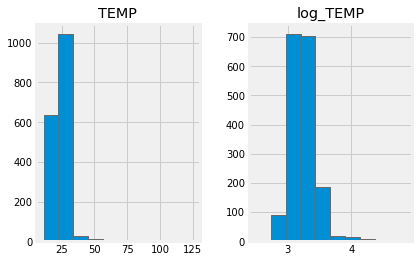

In [12]:
# Create new dataframe to compare the original vs Log transform data
dist_df=pd.DataFrame({'TEMP':df2['TEMP'].values,'log_TEMP':dataset[:,0]})

# Histogram plot original vs Log transform data
plt.figure(figsize=(12,5))
dist_df.hist();

In [13]:
# Split the dataset into train and test sets

train_size=int(len(dataset)*0.75)
test_size=len(dataset)-train_size
train,test=dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train),len(test))

1299 434


In [14]:
# Convert an array of values into a dataset matrix

def create_dataset(dataset,look_back=1):
    dataX, dataY=[],[]
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX),np.array(dataY)

# reshape the train and test data

look_back=1
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

print('Shape of trainX :',trainX.shape)
print('Shape of trainY :',trainY.shape)
print('Shape of testX :',testX.shape)
print('Shape of testY :',testY.shape)

Shape of trainX : (1297, 1)
Shape of trainY : (1297,)
Shape of testX : (432, 1)
Shape of testY : (432,)


In [15]:
# Reshape the input array in the form-[samples, time steps, features]

trainX=np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX=np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

print('Shape of trainX :',trainX.shape)
print('Shape of testX :',testX.shape)

Shape of trainX : (1297, 1, 1)
Shape of testX : (432, 1, 1)


In [16]:
# Create and fit the LSTM Neural Network

model=Sequential()
model.add(LSTM(4,input_shape=(1,look_back)))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=500,batch_size=32, verbose=2)

Epoch 1/500
41/41 - 5s - loss: 10.8288 - 5s/epoch - 111ms/step
Epoch 2/500
41/41 - 0s - loss: 10.2437 - 57ms/epoch - 1ms/step
Epoch 3/500
41/41 - 0s - loss: 9.6469 - 94ms/epoch - 2ms/step
Epoch 4/500
41/41 - 0s - loss: 9.0091 - 78ms/epoch - 2ms/step
Epoch 5/500
41/41 - 0s - loss: 8.3266 - 62ms/epoch - 2ms/step
Epoch 6/500
41/41 - 0s - loss: 7.6162 - 94ms/epoch - 2ms/step
Epoch 7/500
41/41 - 0s - loss: 6.9060 - 62ms/epoch - 2ms/step
Epoch 8/500
41/41 - 0s - loss: 6.2208 - 78ms/epoch - 2ms/step
Epoch 9/500
41/41 - 0s - loss: 5.5775 - 62ms/epoch - 2ms/step
Epoch 10/500
41/41 - 0s - loss: 4.9835 - 95ms/epoch - 2ms/step
Epoch 11/500
41/41 - 0s - loss: 4.4374 - 85ms/epoch - 2ms/step
Epoch 12/500
41/41 - 0s - loss: 3.9331 - 70ms/epoch - 2ms/step
Epoch 13/500
41/41 - 0s - loss: 3.4447 - 70ms/epoch - 2ms/step
Epoch 14/500
41/41 - 0s - loss: 2.9020 - 81ms/epoch - 2ms/step
Epoch 15/500
41/41 - 0s - loss: 2.2763 - 58ms/epoch - 1ms/step
Epoch 16/500
41/41 - 0s - loss: 1.6875 - 75ms/epoch - 2ms/step

Epoch 131/500
41/41 - 0s - loss: 0.0351 - 65ms/epoch - 2ms/step
Epoch 132/500
41/41 - 0s - loss: 0.0351 - 66ms/epoch - 2ms/step
Epoch 133/500
41/41 - 0s - loss: 0.0351 - 77ms/epoch - 2ms/step
Epoch 134/500
41/41 - 0s - loss: 0.0350 - 54ms/epoch - 1ms/step
Epoch 135/500
41/41 - 0s - loss: 0.0349 - 84ms/epoch - 2ms/step
Epoch 136/500
41/41 - 0s - loss: 0.0349 - 62ms/epoch - 2ms/step
Epoch 137/500
41/41 - 0s - loss: 0.0349 - 71ms/epoch - 2ms/step
Epoch 138/500
41/41 - 0s - loss: 0.0348 - 76ms/epoch - 2ms/step
Epoch 139/500
41/41 - 0s - loss: 0.0348 - 55ms/epoch - 1ms/step
Epoch 140/500
41/41 - 0s - loss: 0.0347 - 81ms/epoch - 2ms/step
Epoch 141/500
41/41 - 0s - loss: 0.0347 - 64ms/epoch - 2ms/step
Epoch 142/500
41/41 - 0s - loss: 0.0346 - 70ms/epoch - 2ms/step
Epoch 143/500
41/41 - 0s - loss: 0.0346 - 62ms/epoch - 2ms/step
Epoch 144/500
41/41 - 0s - loss: 0.0344 - 73ms/epoch - 2ms/step
Epoch 145/500
41/41 - 0s - loss: 0.0344 - 85ms/epoch - 2ms/step
Epoch 146/500
41/41 - 0s - loss: 0.0343 

Epoch 259/500
41/41 - 0s - loss: 0.0321 - 87ms/epoch - 2ms/step
Epoch 260/500
41/41 - 0s - loss: 0.0321 - 61ms/epoch - 1ms/step
Epoch 261/500
41/41 - 0s - loss: 0.0323 - 84ms/epoch - 2ms/step
Epoch 262/500
41/41 - 0s - loss: 0.0321 - 84ms/epoch - 2ms/step
Epoch 263/500
41/41 - 0s - loss: 0.0325 - 63ms/epoch - 2ms/step
Epoch 264/500
41/41 - 0s - loss: 0.0323 - 85ms/epoch - 2ms/step
Epoch 265/500
41/41 - 0s - loss: 0.0321 - 93ms/epoch - 2ms/step
Epoch 266/500
41/41 - 0s - loss: 0.0322 - 69ms/epoch - 2ms/step
Epoch 267/500
41/41 - 0s - loss: 0.0321 - 81ms/epoch - 2ms/step
Epoch 268/500
41/41 - 0s - loss: 0.0323 - 84ms/epoch - 2ms/step
Epoch 269/500
41/41 - 0s - loss: 0.0322 - 79ms/epoch - 2ms/step
Epoch 270/500
41/41 - 0s - loss: 0.0322 - 82ms/epoch - 2ms/step
Epoch 271/500
41/41 - 0s - loss: 0.0322 - 80ms/epoch - 2ms/step
Epoch 272/500
41/41 - 0s - loss: 0.0321 - 71ms/epoch - 2ms/step
Epoch 273/500
41/41 - 0s - loss: 0.0324 - 86ms/epoch - 2ms/step
Epoch 274/500
41/41 - 0s - loss: 0.0322 

Epoch 387/500
41/41 - 0s - loss: 0.0321 - 76ms/epoch - 2ms/step
Epoch 388/500
41/41 - 0s - loss: 0.0321 - 80ms/epoch - 2ms/step
Epoch 389/500
41/41 - 0s - loss: 0.0320 - 78ms/epoch - 2ms/step
Epoch 390/500
41/41 - 0s - loss: 0.0320 - 59ms/epoch - 1ms/step
Epoch 391/500
41/41 - 0s - loss: 0.0320 - 76ms/epoch - 2ms/step
Epoch 392/500
41/41 - 0s - loss: 0.0320 - 72ms/epoch - 2ms/step
Epoch 393/500
41/41 - 0s - loss: 0.0323 - 80ms/epoch - 2ms/step
Epoch 394/500
41/41 - 0s - loss: 0.0321 - 81ms/epoch - 2ms/step
Epoch 395/500
41/41 - 0s - loss: 0.0319 - 88ms/epoch - 2ms/step
Epoch 396/500
41/41 - 0s - loss: 0.0321 - 85ms/epoch - 2ms/step
Epoch 397/500
41/41 - 0s - loss: 0.0320 - 83ms/epoch - 2ms/step
Epoch 398/500
41/41 - 0s - loss: 0.0321 - 88ms/epoch - 2ms/step
Epoch 399/500
41/41 - 0s - loss: 0.0321 - 82ms/epoch - 2ms/step
Epoch 400/500
41/41 - 0s - loss: 0.0320 - 88ms/epoch - 2ms/step
Epoch 401/500
41/41 - 0s - loss: 0.0322 - 82ms/epoch - 2ms/step
Epoch 402/500
41/41 - 0s - loss: 0.0320 

# Make Predictions

In [17]:
# Make Predictions

trainPredict=model.predict(trainX)
testPredict=model.predict(testX)

# Invert predictions
trainPredict=np.expm1(trainPredict)
trainY=np.expm1(trainY)
testPredict=np.expm1(testPredict)
testY=np.expm1(testY)

# Calculate root mean square error

trainScore=math.sqrt(mean_squared_error(trainY,trainPredict[:,0]))
print('Train Score:%.2f RMSE' %(trainScore))
testScore=math.sqrt(mean_squared_error(testY,testPredict[:,0]))
print('Test Score:%.2f RMSE' %(testScore))

14/14 [==============================] - 0s 3ms/step
Train Score:6.68 RMSE
Test Score:4.62 RMSE


In [18]:
test_series=pd.Series(testY)

# State of model performance

if testScore < test_series.std():
    print('\n[Model performance is GOOD enough]')
    print('nRMSE of test prediction < Standard deviation of the test dataset')
    print('%.2f' % (testScore),'<','%2f' % (test_series.std()))
else:
    print('\n[Model performance is NOT GOOD enough]')
    print('nRMSE of test prediction > Standard deviation of the test dataset')
    print('%.2f' % (testScore),'>','%2f' % (test_series.std()))


[Model performance is GOOD enough]
nRMSE of test prediction < Standard deviation of the test dataset
4.62 < 5.281872


(1360.0, 1735.0)

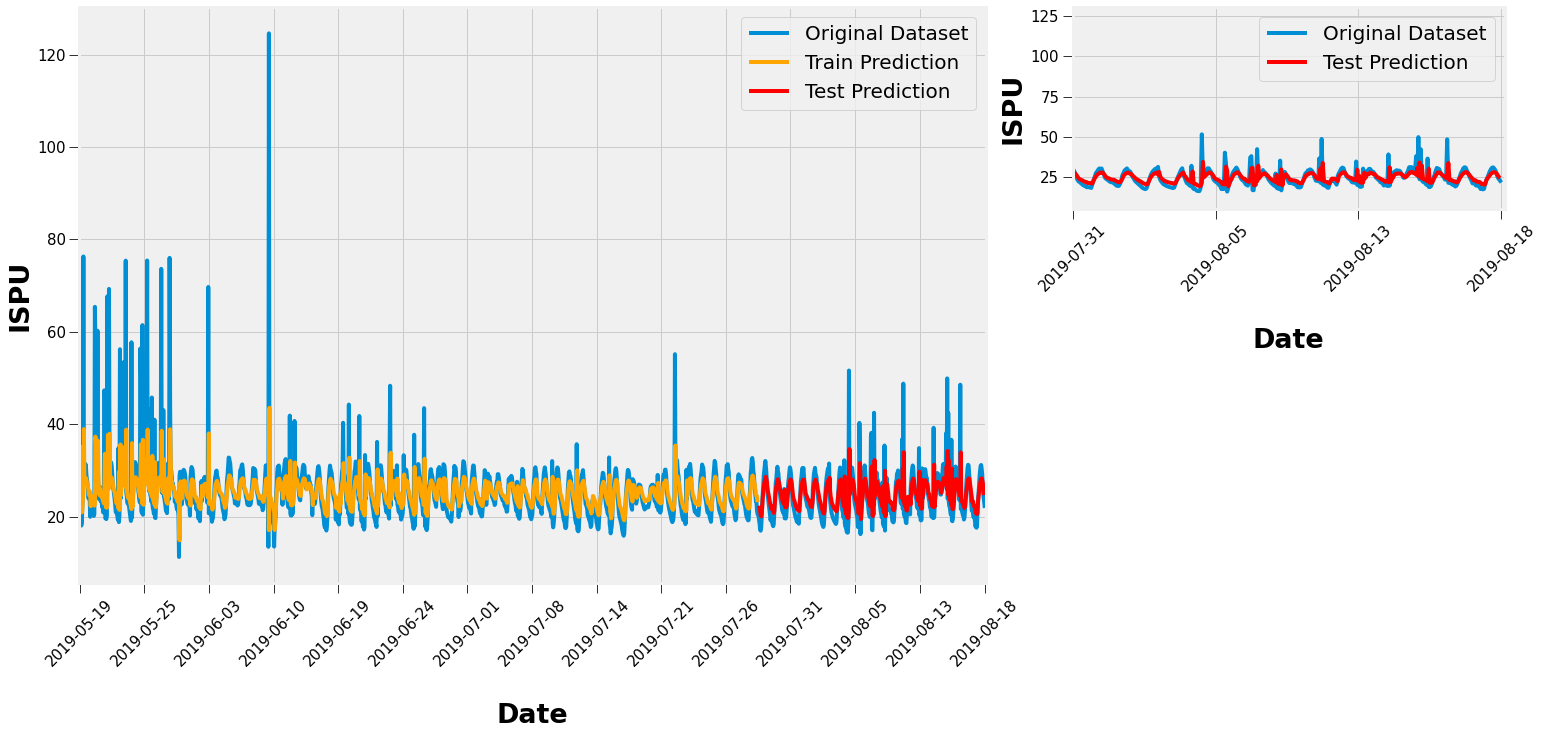

In [19]:
# Shift train prediction for ploting
trainPredictPlot=np.empty_like(dataset)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:]=trainPredict

# Shift test prediction for ploting
testPredictPlot=np.empty_like(dataset)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:]=testPredict

# Plot original dataset and predictions
time_axis=np.linspace(0,dataset.shape[0]-1,15)
time_axis=np.array([int(i) for i in time_axis])
time_axisLab=np.array(df2.index,dtype='datetime64[D]')

fig=plt.figure()
ax=fig.add_axes([0,0,2.1,2])
ax.plot(np.expm1(dataset),label='Original Dataset')
ax.plot(trainPredictPlot, color='Orange', label='Train Prediction')
ax.plot(testPredictPlot, color='Red', label='Test Prediction')
ax.set_xticks(time_axis)
ax.set_xticklabels(time_axisLab[time_axis],rotation=45)
ax.set_xlabel('\nDate',fontsize=27,fontweight='bold')
ax.set_ylabel('ISPU',fontsize=27,fontweight='bold')
ax.legend(loc='best',prop={'size':20})
ax.tick_params(size=10,labelsize=15)
ax.set_xlim([-1,1735])

ax1=fig.add_axes([2.3,1.3,1,0.7])
ax1.plot(np.expm1(dataset),label='Original Dataset')
ax1.plot(testPredictPlot, color='Red', label='Test Prediction')
ax1.set_xticks(time_axis)
ax1.set_xticklabels(time_axisLab[time_axis],rotation=45)
ax1.set_xlabel('\nDate',fontsize=27,fontweight='bold')
ax1.set_ylabel('ISPU',fontsize=27,fontweight='bold')
ax1.legend(loc='best',prop={'size':20})
ax1.tick_params(size=10,labelsize=15)
ax1.set_xlim([1360,1735])
